# Prediction of Product Sales
  - Author: Ben Fajack


## Project Overview

## Load and Inspect Data

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
sales_pred = pd.read_csv(fpath)
sales_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
sales_pred.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

In [ ]:
# rows: 8523
# columns: 12
# 3 data types; float, integer, object

In [ ]:
duplicate_rows = sales_pred.duplicated()
duplicate_rows

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [ ]:
duplicate_rows.sum()  #total number of duplicated rows

0

In [ ]:
null_counts = sales_pred.isnull().sum()  #total occurences of missing values
null_counts

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
cat_cols = sales_pred.columns.tolist()  #list of column names
cat_cols

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [ ]:
sales_pred[cat_cols] = sales_pred[cat_cols].fillna('Nan') # addressing null by inserting 'NaN'
sales_pred[cat_cols]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Nan,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Nan,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.6,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
sales_pred[cat_cols].isna()
sales_pred[cat_cols].isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
sales_pred['Item_Fat_Content'].value_counts() # inspecting column Item Fat Content

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
sales_pred['Item_Fat_Content'] = sales_pred['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular'}) # replacing inconsistencies

In [ ]:
sales_pred['Item_Fat_Content'] = sales_pred['Item_Fat_Content'].replace({'low fat':'Low Fat'}) #replacing inconsistencies

In [ ]:
sales_pred['Item_Fat_Content'].value_counts() #inspecting

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
sales_pred[cat_cols].nunique() # checking for unique

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
obj_cols = sales_pred.select_dtypes(include=['object']).columns.tolist() # object list
obj_cols

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
sales_pred[obj_cols].nunique() # unique object columns

Item_Identifier         1559
Item_Weight              416
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [ ]:
numeric_columns = sales_pred.select_dtypes(include='number')
numeric_columns.min()

Item_Visibility                 0.00
Item_MRP                       31.29
Outlet_Establishment_Year    1985.00
Item_Outlet_Sales              33.29
dtype: float64

In [ ]:
numeric_columns.max()

Item_Visibility                  0.328391
Item_MRP                       266.888400
Outlet_Establishment_Year     2009.000000
Item_Outlet_Sales            13086.964800
dtype: float64

In [ ]:
numeric_columns.mean()

Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

In [ ]:
numeric_columns.describe() # summary stats

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
numeric_columns = numeric_columns.fillna(-1)

In [ ]:
numeric_columns.isna().sum()

Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
sales_pred.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Nan,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
sales_pred.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Nan,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.6,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.8,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


## Exploratory Data Analysis

In [ ]:
sales_pred.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Nan,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


In [ ]:
# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [ ]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

In [ ]:
sales_pred.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Nan,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
sales_pred[feature].dtype

dtype('O')

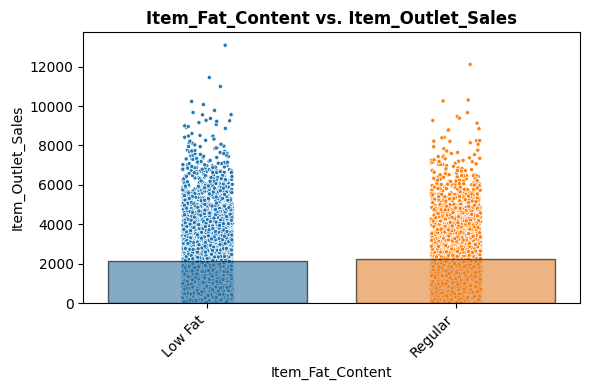

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(sales_pred, 'Item_Fat_Content','Item_Outlet_Sales');

### I would not expect this featuer to be a predictor of the target.

- This feature is categorical (nominal).
- Null values account for 0%.
- Feature is neither constant or quasi-constant.
- Cardinality is high.
- We would know this feature before the target is determined.
- There is no obvious reason to exclude the feature.

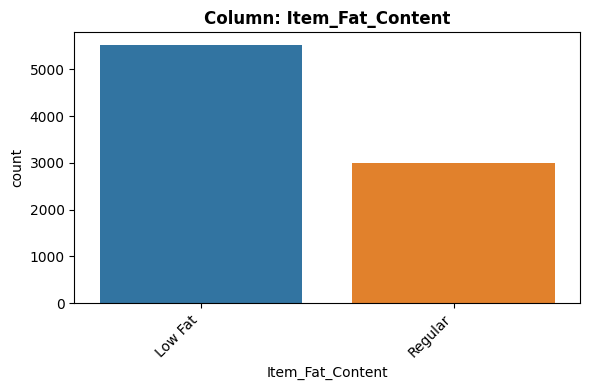

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function
explore_categorical(sales_pred, 'Item_Fat_Content');

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Item_Weight"
sales_pred[feature].dtype

dtype('O')

In [ ]:
sales_pred['Item_Weight'] = sales_pred['Item_Weight'].astype(float)

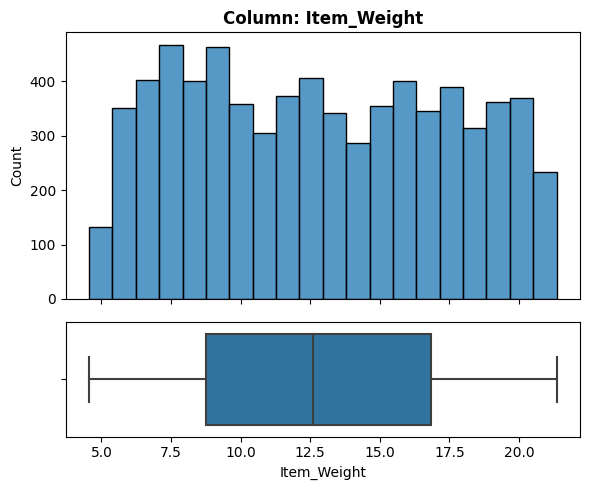

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(sales_pred,'Item_Weight');

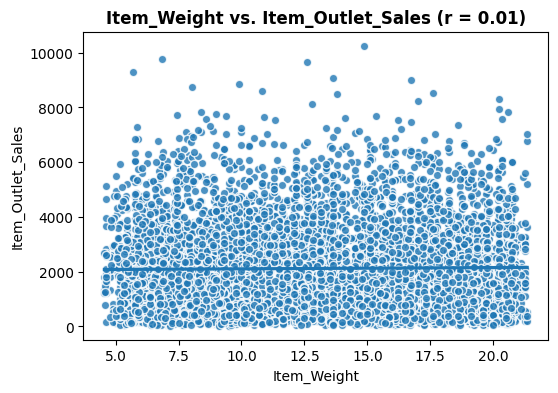

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(sales_pred, 'Item_Weight', 'Item_Outlet_Sales');

### I would not expect this feature to be a predictor of target.

- Feature is numeric
- Null values account for 17.17% of entries at 1463 occurerences.
- Feature is neither constant or quasi-constant.
- Cardinality is high.
- We would know this feature before the target is determined.
- There is no obvious reason to exclude this feature from analysis.

In [ ]:
sales_pred.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,Nan,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Item_visibility"
sales_pred['Item_Visibility'].dtype

dtype('float64')

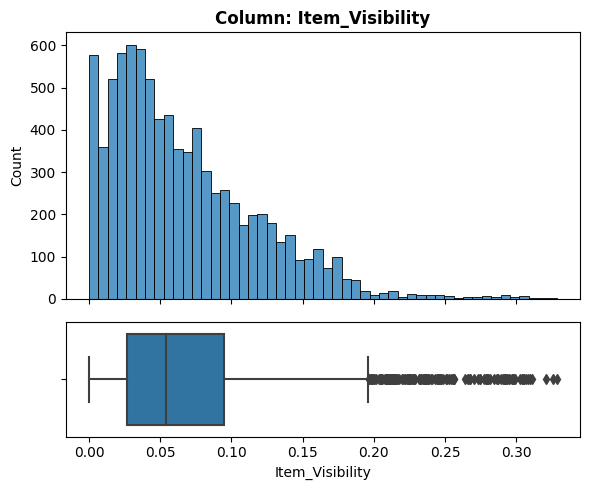

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(sales_pred,'Item_Visibility');

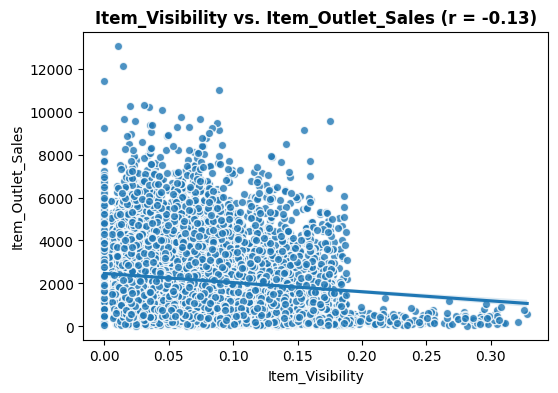

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(sales_pred, 'Item_Visibility', 'Item_Outlet_Sales');

### I would not expect this feature to be a predictor of target.

- Feature is numeric.
- No null values found.
- Feature is neither constant nor quasi-constant.
- Cardinality is high.
- We would know the feature before the target is determined.
- There is no obvious reason to exclude the feature from analysis.

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Item_Type"
sales_pred['Item_Type'].dtype

dtype('O')

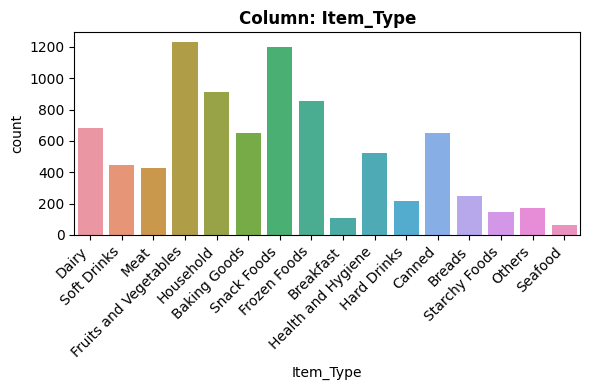

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function
explore_categorical(sales_pred, 'Item_Type');

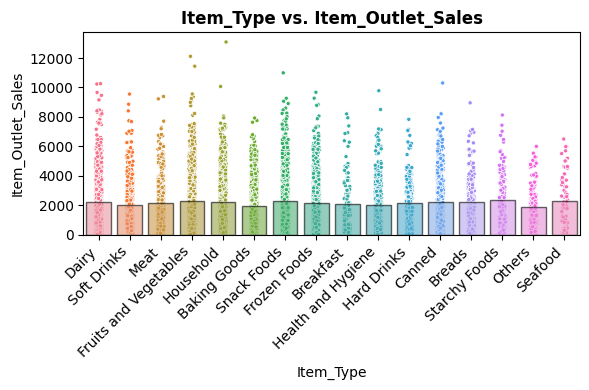

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(sales_pred, 'Item_Type','Item_Outlet_Sales');

### I would not expect this feature to be a predictor of the target.

- Feature is categorical (nominal).
- No null values found.
- Feature is neither constant nor quasi-constant.
- Cardinality is high.
- We would know this feature before the target is determined.
- There is no obvious reason to exclude this feature from analysis.

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Item_MRP"
sales_pred['Item_MRP'].dtype

dtype('float64')

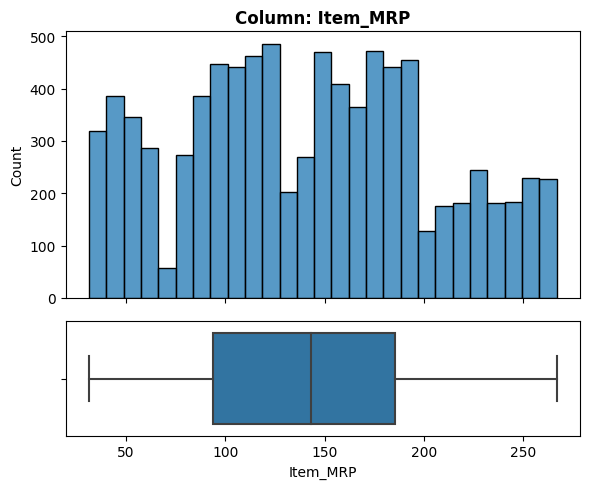

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(sales_pred,'Item_MRP');

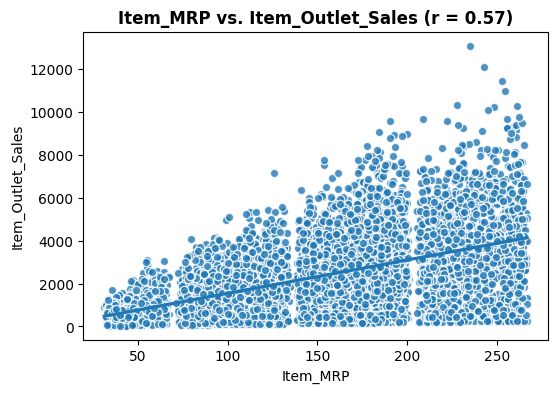

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(sales_pred, 'Item_MRP', 'Item_Outlet_Sales');

### This feature appears to be a predictor of the target.

- This feature is numeric.
- No null values were found.
- Feature is neither constant or quasi-constant.
- Cardinality is high.
- We would know this feature before the target is determined.
- There is no obvious reason to exclude this feature from analysis.

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
sales_pred['Outlet_Establishment_Year'].dtype

dtype('float64')

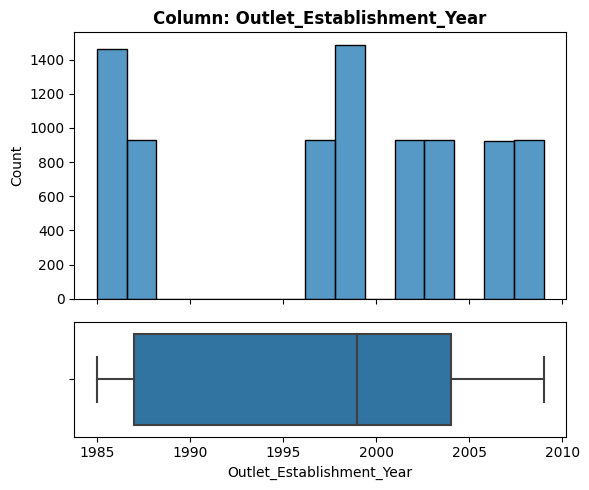

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985.0' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(sales_pred,'Outlet_Establishment_Year');

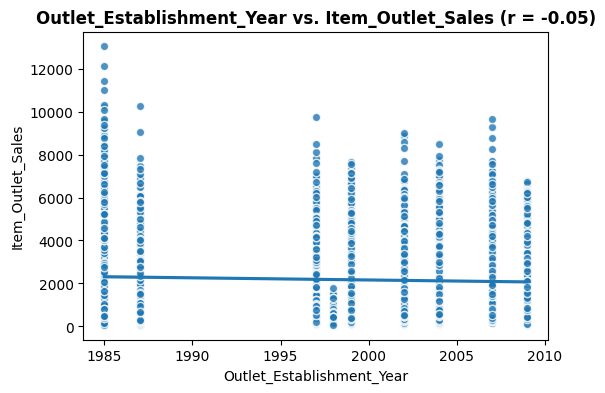

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(sales_pred, 'Outlet_Establishment_Year', 'Item_Outlet_Sales');

### This feature does not appear to be a predictor of the target.

- This feature is numeric.
- No null values found.
- This feature is neither constant nor quasi-constant.
- Cardinality is high.
- We would know this feature before the target is determined.
- There is no obvious reason to exclude this feature from analysis.

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
sales_pred['Outlet_Size'].dtype

dtype('O')

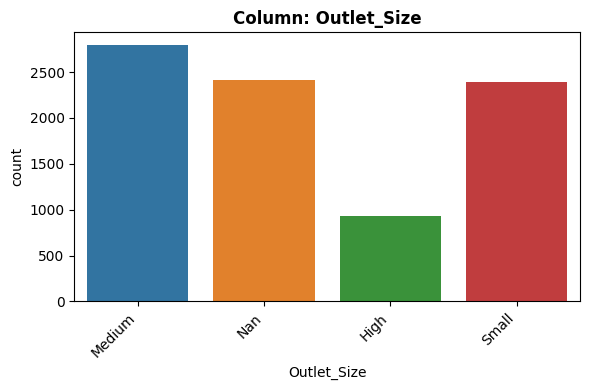

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function
explore_categorical(sales_pred, 'Outlet_Size');

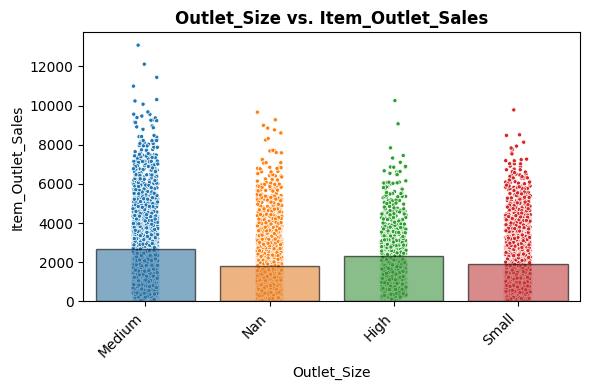

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(sales_pred, 'Outlet_Size','Item_Outlet_Sales');

### This feature does not appear to be a predictor of the target.

- This feature is categorical (nominal).
- No null values found.
- This feature is neither constant nor quasi-constant.
- Cardinality is high.
- We would know this feature before the target is determined.
- There is no obvious reason to exclude this feature from analysis.

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Location_Type"
sales_pred['Outlet_Location_Type'].dtype

dtype('O')

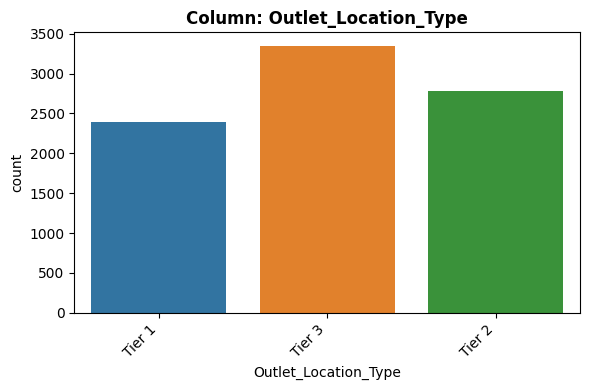

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function
explore_categorical(sales_pred, 'Outlet_Location_Type');

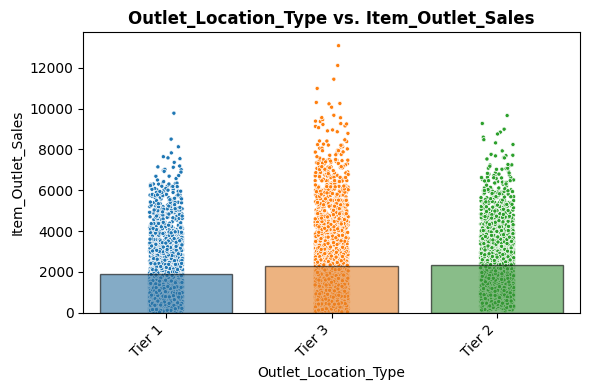

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(sales_pred, 'Outlet_Location_Type','Item_Outlet_Sales');

### therre seems to be a slightly positive correlation here which could represent some predictive ability with analysis of this feature.

- This feature is ordinal.
- No null values found.
- The feature is neither constant nor quasi-constant.
- Cardinality is high.
- We would know the feature before the target is determined.
- There is no obvious reason to exclude this feature from analysis.

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Type"
sales_pred['Outlet_Type'].dtype

dtype('O')

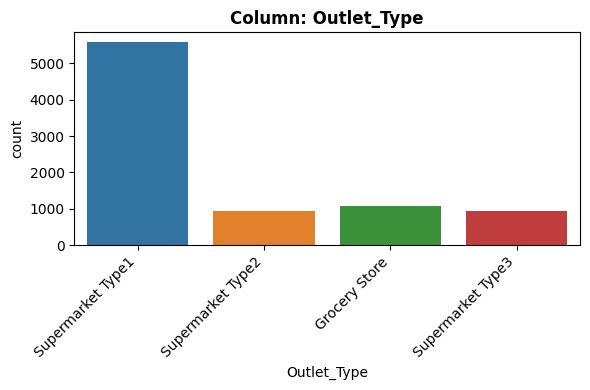

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function
explore_categorical(sales_pred, 'Outlet_Type');

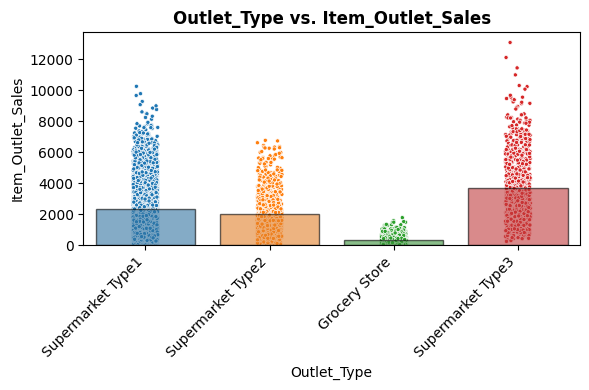

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(sales_pred, 'Outlet_Type','Item_Outlet_Sales');

### Analysis of this feature should provide some predictive feedback for target.

- This feature is categorical (nominal).
- No null values were found.
- The feature is neither constant nor quasi-constant.
- Cardinality is high.
- We would know this feature before the target is determined.
- There is no obvious reason to exclude this feature from analysis.

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Item_Outlet_Sales"
sales_pred['Item_Outlet_Sales'].dtype

dtype('float64')

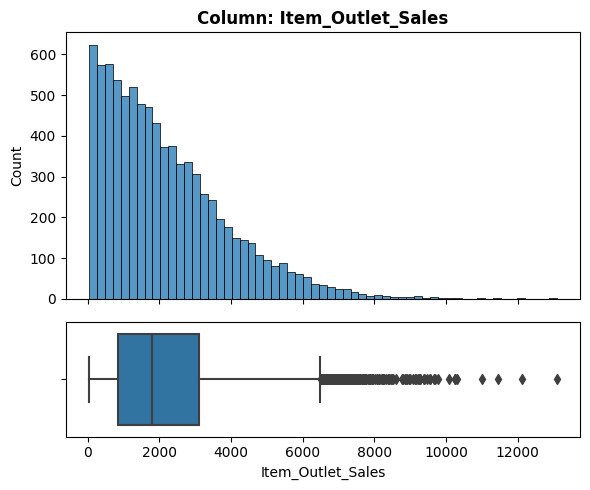

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(sales_pred,'Item_Outlet_Sales');

- This feature is numeric.
- No null values found.
- The feature is neither constant nor quasi-constant.
- Cardinality is high.
- This is the target.
- No reason to exclude the target.


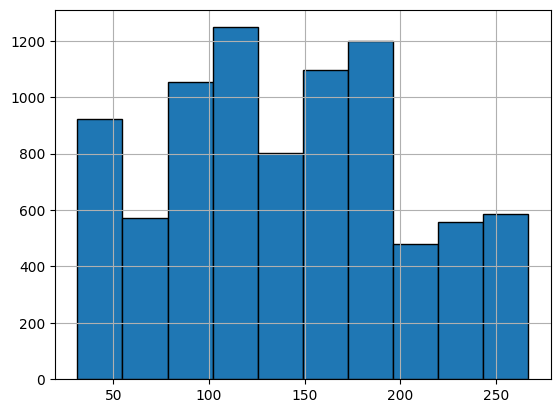

In [ ]:
ax = sales_pred['Item_MRP'].hist(edgecolor = 'black') # histogram of price distribution

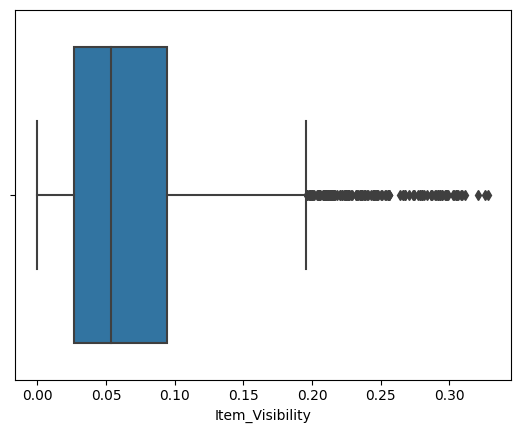

In [ ]:
ax = sns.boxplot(data=sales_pred, x="Item_Visibility")

In [ ]:
numeric_columns = sales_pred.select_dtypes(include='number').columns #converting to floats
sales_pred[numeric_columns] = sales_pred[numeric_columns].astype(float)

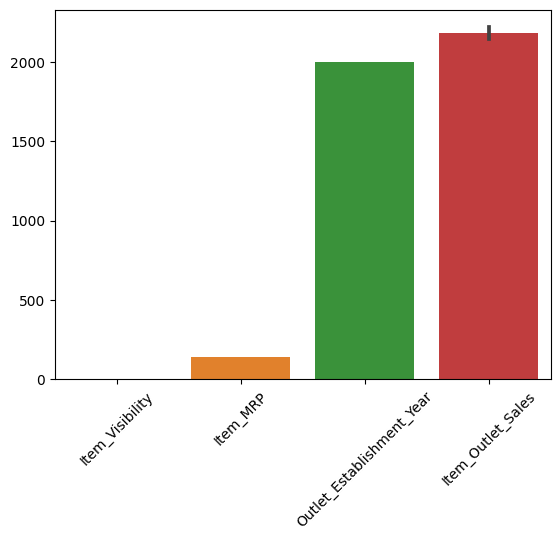

In [ ]:
ax = sns.barplot(data=sales_pred)
plt.xticks(rotation=45);

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Type"
sales_pred['Outlet_Type'].dtype

In [ ]:
corr = sales_pred.corr(numeric_only=True)

[Text(0.5, 1.0, 'Correlation Heatmap')]

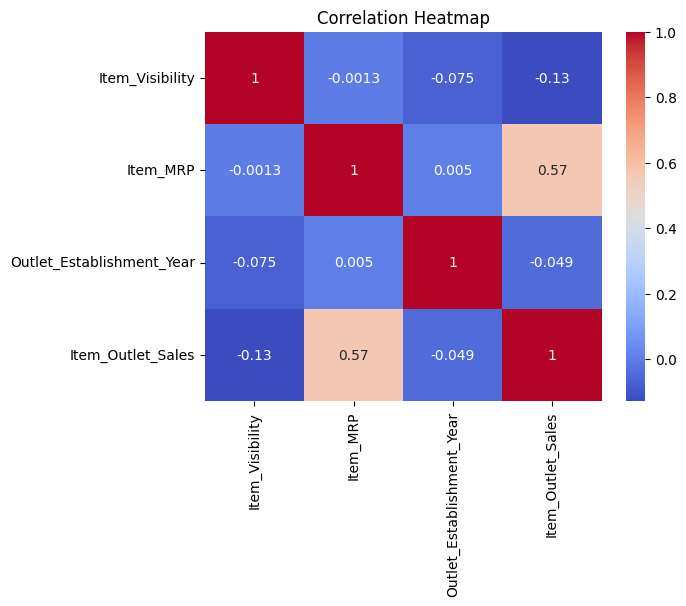

In [ ]:
ax = sns.heatmap(corr,annot=True, cmap='coolwarm');
ax.set(title='Correlation Heatmap')

## Feature Inspection